In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))

# First Steps: Quickstart

In [4]:
# load modules
from FIDOM.NonHydrostatic.ModelSettings import ModelSettings
from FIDOM.NonHydrostatic.Grid import Grid
from FIDOM.NonHydrostatic.InitialConditions import BarotropicJet
from FIDOM.NonHydrostatic.Model import Model
from FIDOM.NonHydrostatic.Plot import Plot

100%|██████████| 1000/1000 [00:08<00:00, 117.97it/s]


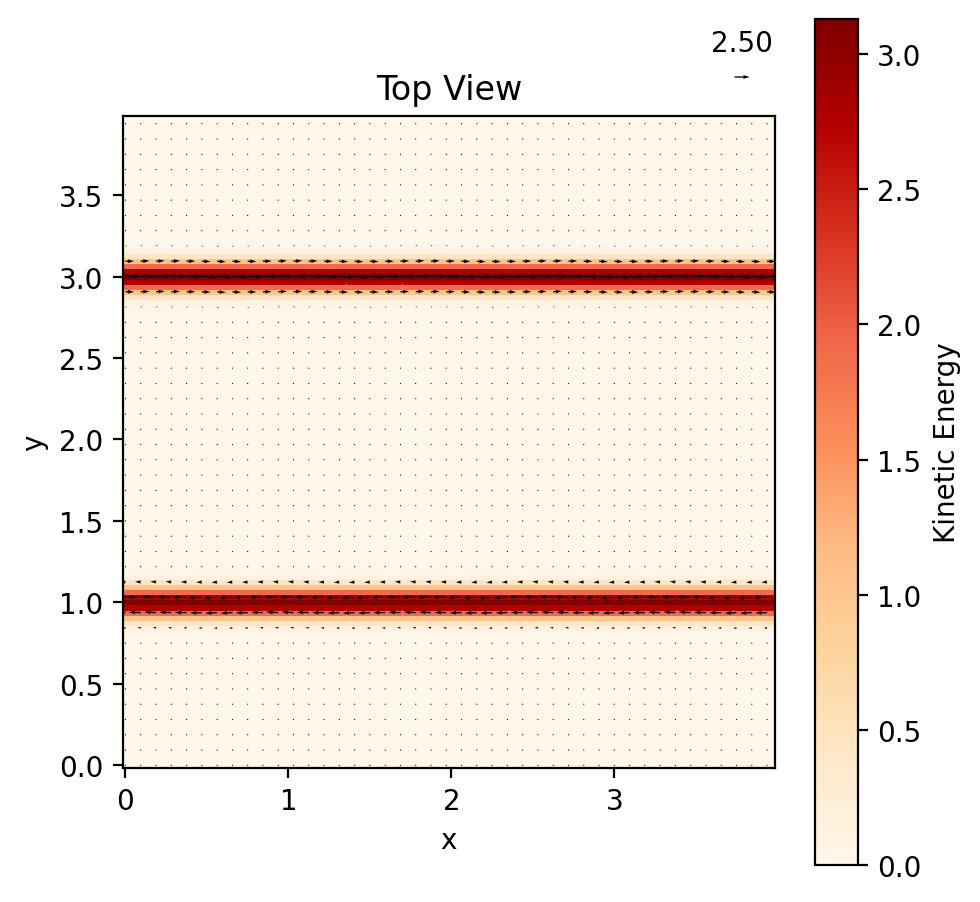

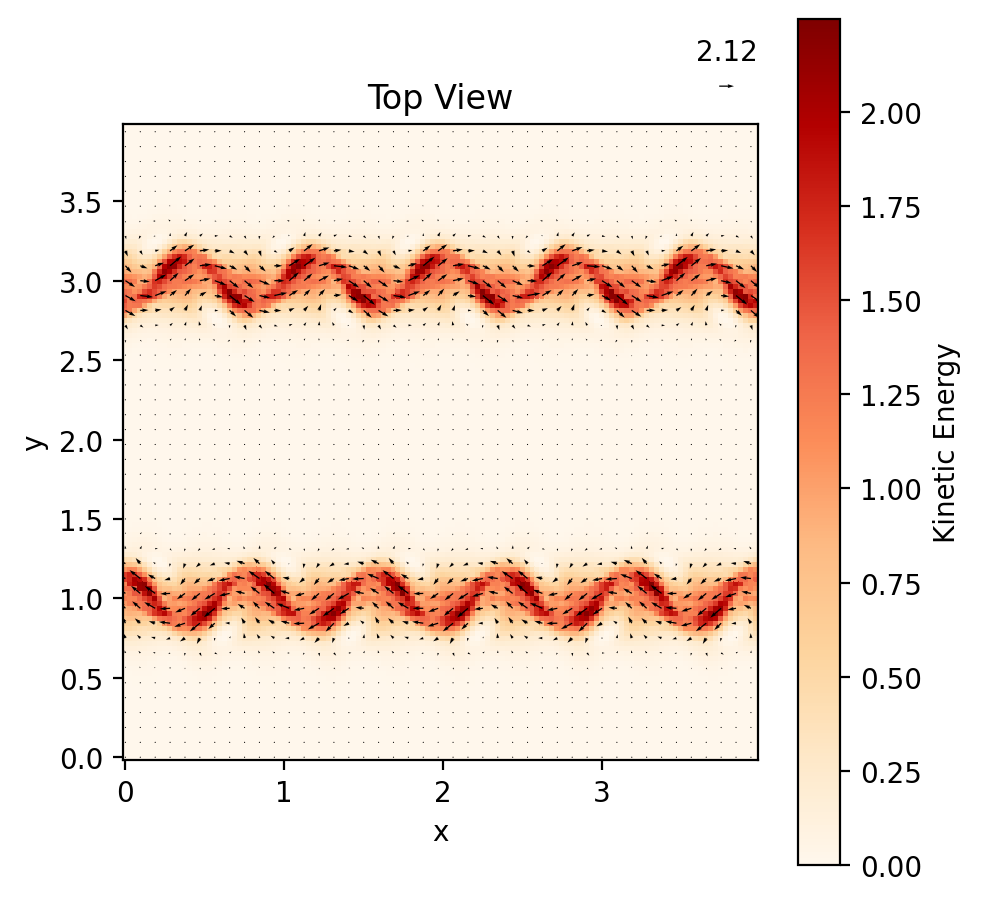

In [6]:
mset = ModelSettings(Ro=0.5)            # create model settings
mset.N = [2**7, 2**7, 2**4]             # set resolution
mset.L = [4, 4, 1]                      # set domain size 
grid = Grid(mset)                       # create grid
model = Model(mset, grid)               # create model
model.z = BarotropicJet(mset, grid)     # set initial conditions

# plot top view of initial kinetic energy
Plot(model.z.ekin()).top(model.z)

# run model
model.run(runlen=2)

# plot top view of final kinetic energy
Plot(model.z.ekin()).top(model.z)

## Model Settings
The model settings class is used to set the model paramters, for example physical parameters, such as the coriolis parameter, or numerical parameters, such as the resolution and the time step. A list of all model settings can be found in the documentation of the ModelSettings class ("py_src/ModelSettings.py"). Settings can be given as keyword arguments to the constructor or can modified later on:

In [7]:
# Modify Settings during the construction
# Settings with Rossby number 0.1 and Brunt-Väisälä frequency 2
mset = ModelSettings(Ro=0.1, N0=2)

# Modify Settings after the construction
mset.N = [200, 200, 30]    # change resolution

# print settings
mset                       # alternatively: print(mset)

  Model Settings:
  Model name: Unnamed model
  Spatial parameters:
    n_dims = 3
    L = [1.000, 1.000, 1.000]
    N = [200, 200, 30]
    dg = [0.005, 0.005, 0.033]
  Boundary conditions:
    Periodic : [True, True, True]
  Time parameters:
    dt  = 0.002    eps = 0.010
    time_levels = 3
------------------------------------------------
  Physical parameters:
    f0   = 1.000
    beta = 0.000
    N0   = 2.000
    dsqr = 0.040
    Ro   = 0.100
  Friction and mixing parameters:
    ahbi = 0.00e+00    avbi = 0.00e+00
    khbi = 0.00e+00    kvbi = 0.00e+00
    ah   = 0.00e+00    av   = 0.00e+00
    kh   = 0.00e+00    kv   = 0.00e+00
  Pressure solver:
    pressure_solver = Spectral
    max_cg_iter     = 200
    cg_tol          = 1e-10
  Switches:
    enable_nonlinear  = True
    enable_varying_N  = False
    enable_varying_f  = False
    enable_source     = False
    enable_biharmonic = False
    enable_harmonic   = False

## Grid
The grid class stores meshgrids of the physical and spectral domain. It is constructed from the ModelSettings. When modifying the ModelSettings after creating the grid, the grid is not updated. The model needs it to solve for the pressure term. Further it is usefull for creating own custom initial conditions (See 02_state_and_field.ipynb)

## Model
The model consist of 4 prognostic variables (u,v,w,b) that are stored in the state variable z. And a diagnostic variable (p) that is computed from the prognostic variables. The state variable can be accessed with `model.z` and the diagnostic variable with `model.p`. (Note: the pressure can only be accessed but not modified.)

In [8]:
mset = ModelSettings()              # create model settings
mset.N = [100, 100, 20]
mset.L = [4, 4, 1]
mset.diag_interval = 200            # set diagnostic interval to 200
mset.enable_diag = True             # enable diagnostics output
mset.enable_tqdm = False            # disable progress bar

grid = Grid(mset)                   # create grid

z_ini = BarotropicJet(mset, grid)   # create initial conditions

model = Model(mset, grid)           # create model
model.z = z_ini.copy()              # set initial conditions

# model runtime can either be specified in time steps or in seconds
model.run(steps=1000)               # run model

# get final state of model
z_final = model.z
p_final = model.p

# print summary of timing information
model.timer                       # alternatively: print(model.timer)

Diagnostic at t = 0.00
MKE = 2.49e-01,    MPE = 1.05e-35,    MTE = 2.49e-01
hor. CFL = 0.13,           vert. CFL = 0.00
Diagnostic at t = 0.40
MKE = 2.49e-01,    MPE = 2.61e-33,    MTE = 2.49e-01
hor. CFL = 0.13,           vert. CFL = 0.00
Diagnostic at t = 0.80
MKE = 2.49e-01,    MPE = 1.47e-32,    MTE = 2.49e-01
hor. CFL = 0.13,           vert. CFL = 0.00
Diagnostic at t = 1.20
MKE = 2.49e-01,    MPE = 3.29e-32,    MTE = 2.49e-01
hor. CFL = 0.13,           vert. CFL = 0.00
Diagnostic at t = 1.60
MKE = 2.49e-01,    MPE = 5.87e-32,    MTE = 2.49e-01
hor. CFL = 0.13,           vert. CFL = 0.00


 Timing Summary: 
Total Integration             : 00:00:08s   (100.0%)
Diagnose                      : 00:00:00s   (2.6%)
Write Snapshot                : 00:00:00s   (0.0%)
Linear Tendency               : 00:00:01s   (14.4%)
Nonlinear Tendency            : 00:00:03s   (40.9%)
Harmonic Tendency             : 00:00:00s   (0.0%)
Biharmonic Tendency           : 00:00:00s   (0.0%)
Source Tendency               : 00:00:00s   (0.0%)
Adam Bashforth Stepping       : 00:00:01s   (19.3%)
Pressure Solve                : 00:00:01s   (15.1%)
Pressure Gradient             : 00:00:00s   (7.2%)